## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
original_df= pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
original_df.head()





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice=original_df["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [5]:
mice=original_df.index.value_counts()
print(mice)



1891    1
1268    1
1244    1
1246    1
1248    1
       ..
637     1
639     1
641     1
643     1
0       1
Length: 1893, dtype: int64


In [6]:
print(len(original_df))

1893


In [7]:
print(original_df.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892],
           dtype='int64', length=1893)


In [8]:
Combined_data=original_df.set_index("Mouse ID")

In [7]:
print(Combined_data.index)


Index(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923', 'q119',
       'f993',
       ...
       't718', 'o562', 'i177', 'v991', 'z795', 'r944', 'u364', 'p438', 'x773',
       'b879'],
      dtype='object', name='Mouse ID', length=1893)


In [8]:
#print(Combined_data.head())
print(Combined_data.loc["g989"])
#Combined_data=Combined_data.set_index("Mouse ID")
#duplicate_mice=pd.DataFrame(Combined_data.groupby(["Mouse ID"]))
#print(duplicate_mice.head())

          Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
Mouse ID                                                                 
g989              0           45.000000                 0     Propriva   
g989              0           45.000000                 0     Propriva   
g989              5           48.786801                 0     Propriva   
g989              5           47.570392                 0     Propriva   
g989             10           51.745156                 0     Propriva   
g989             10           49.880528                 0     Propriva   
g989             15           51.325852                 1     Propriva   
g989             15           53.442020                 0     Propriva   
g989             20           55.326122                 1     Propriva   
g989             20           54.657650                 1     Propriva   
g989             25           56.045564                 1     Propriva   
g989             30           59.08229

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 



In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df_indices=Combined_data.index.duplicated(keep="first")
clean_df=Combined_data[~clean_df_indices]
print (clean_df)
print (len(clean_df))

          Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
Mouse ID                                                                 
b128              0                45.0                 0    Capomulin   
f932              0                45.0                 0     Ketapril   
g107              0                45.0                 0     Ketapril   
a457              0                45.0                 0     Ketapril   
c819              0                45.0                 0     Ketapril   
...             ...                 ...               ...          ...   
t565              0                45.0                 0    Capomulin   
i557              0                45.0                 0    Capomulin   
m957              0                45.0                 0    Capomulin   
f966              0                45.0                 0    Capomulin   
m601              0                45.0                 0    Capomulin   

             Sex  Age_months  Weight 

In [11]:
#print (clean_df_indices)
#clean_df=Combined_data[clean_df_indices]
#print(len(Combined_data.loc["g989"]))

In [12]:
# Checking the number of mice in the clean DataFrame.
#Combined_data.count_values()
#print(Combined_data.count_values())
#print (clean_df.nunique())
print(clean_df.index)
print(clean_df.head())
#Combined_data=clean_df.set_index("Mouse ID")
print(clean_df.loc["g989"])

Index(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923', 'q119',
       'f993',
       ...
       'y793', 'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'],
      dtype='object', name='Mouse ID', length=249)
          Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
Mouse ID                                                                 
b128              0                45.0                 0    Capomulin   
f932              0                45.0                 0     Ketapril   
g107              0                45.0                 0     Ketapril   
a457              0                45.0                 0     Ketapril   
c819              0                45.0                 0     Ketapril   

             Sex  Age_months  Weight (g)  
Mouse ID                                  
b128      Female           9          22  
f932        Male          15          29  
g107      Female           2          29  
a457      Femal

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_mean = Combined_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = Combined_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = Combined_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = Combined_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = Combined_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

single_group_by = Combined_data.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2





,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

['Zoniferol', 'Placebo', 'Propriva', 'Ketapril', 'Infubinol', 'Naftisol', 'Ceftamin', 'Capomulin', 'Ramicane', 'Stelasyn']


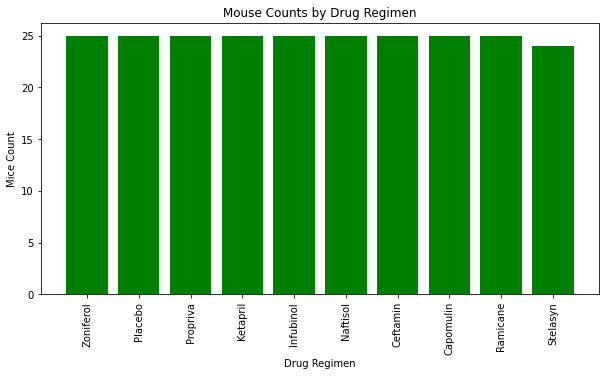

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_index= (clean_df["Drug Regimen"].value_counts())
xvalues=drug_index.index.tolist()
print (xvalues)
plt.figure(figsize=(10,5))
plt.title("Mouse Counts by Drug Regimen")
plt.ylabel("Mice Count")
plt.xlabel("Drug Regimen")
drug_bar_chart=plt.bar(xvalues,drug_index, color="green")
plt.xticks(rotation=90)
plt.show()



Male      50.2
Female    49.8
Name: Sex, dtype: float64
['Male', 'Female']


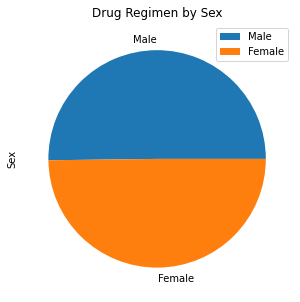

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
num_gender=clean_df["Sex"].value_counts(normalize=True).mul(100).round(1)
print (num_gender)
labels=num_gender.index.tolist()
print (labels)
gender_data_frame=pd.DataFrame(data={"Sex":[num_gender[0],num_gender[1]]},index=[labels[0],labels[1]])
gender_data_frame.head()
gender_plot=gender_data_frame.plot.pie(y="Sex",figsize=(5,5),title="Drug Regimen by Sex")

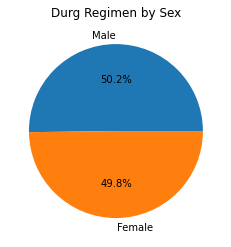

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(num_gender,labels=labels,autopct="%1.1f%%")
plt.title("Durg Regimen by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Combined_data.head()
#print (Combined_data["Timepoint"].value_counts())
#(Combined_data.groupby(["Mouse ID"])).describe()
options = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df_filter =  Combined_data[Combined_data['Drug Regimen'].isin(options)]
Combined_data.loc["g989"]
mice_names= df_filter.index
maxtime=[]
reindexed = study_results.set_index('Mouse ID')
for i in range( len(df_filter)):
    df= reindexed.loc[[mice_names[i]]]    
    max_value= df["Timepoint"].max()
    maxtime.append(max_value)
    #print(str(i)+" : "+mice_names[i]+" : "+str(max_value))
d = {'Timepoint': maxtime}
df = pd.DataFrame(data=d,index=mice_names)
df



    

,Timepoint
Mouse ID,
b128,45
c326,5
c139,45
v339,5
a577,30
...,...
a644,45
i177,45
r944,45


In [51]:

   #greatest timepoint  
#0     1     
#1     2     
    
    


# Combine the data into a single dataset
max_df= pd.merge(df_filter,df,how = 'inner',on=[ 'Timepoint', 'Mouse ID']).drop_duplicates()
max_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
u153,0,45.000000,0,Ceftamin,Female,11,25
b447,0,45.000000,0,Ceftamin,Male,2,30
x226,0,45.000000,0,Ceftamin,Male,23,28
t573,0,45.000000,0,Ceftamin,Female,15,27
c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...
a644,45,32.978522,1,Ramicane,Female,7,17
i177,45,33.562402,3,Ramicane,Male,10,18
r944,45,41.581521,2,Capomulin,Male,12,25


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments=(Combined_data["Drug Regimen"].value_counts())
#print (Combined_data["Drug Regimen"].value_counts())
#print (Treatments.index)

Treatments2=(clean_df["Drug Regimen"].value_counts())
#print (clean_df["Drug Regimen"].value_counts())
#print (Treatments2.index)
#print (Treatments2.index.size)
#print (Treatments2.to_list())
#print (Treatments2.index.to_list())
#print (Treatments.index.to_list())
Drug_Names=Treatments.index.to_list()
print (Drug_Names)
# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data=[]
#print (Tumor_vol_data)
#print (len(Tumor_vol_data))
#Tumor_vol_data.append(10.5)
#print (Tumor_vol_data)
#print (len(Tumor_vol_data))
#Tumor_vol_data.append(27)
#print(len(Tumor_vol_data))
#print (Tumor_vol_data)

print ("Output of forloop")
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in Drug_Names:
    print (i)
    #print(clean_df.loc[clean_df["Drug Regimen"]==i,["Tumor Volume (mm3)"]])
    Drug_Volumes=(clean_df.loc[clean_df["Drug Regimen"]==i,["Tumor Volume (mm3)"]])
    Drug_Values= (Drug_Volumes.values)
   # print (Drug_Values)
    sum=np.sum(Drug_Values) 
    print("sum is")
    print(sum)
    Q1=np.percentile(Drug_Values,25)
    print(Q1)
    Q3=np.percentile(Drug_Values,75)
    print(Q3)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    Outliers=[Value for x in Drug_Values if x > upper_bound or x < lower_bound]
    print(Outliers)
    #df.loc[df['shield'] > 6, ['max_speed']]
    
    
    #df.loc[df['shield'] > 6]
    #Tumor_vol_data.append(9)
    
#print (Tumor_vol_data)
#print (len(Tumor_vol_data))
#print (clean_df.columns) 
#print (clean_df)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva']
Output of forloop
Capomulin
sum is
1125.0
45.0
45.0
[]
Ramicane
sum is
1125.0
45.0
45.0
[]
Ketapril
sum is
1125.0
45.0
45.0
[]
Naftisol
sum is
1125.0
45.0
45.0
[]
Zoniferol
sum is
1125.0
45.0
45.0
[]
Stelasyn
sum is
1080.0
45.0
45.0
[]
Placebo
sum is
1125.0
45.0
45.0
[]
Ceftamin
sum is
1125.0
45.0
45.0
[]
Infubinol
sum is
1125.0
45.0
45.0
[]
Propriva
sum is
1125.0
45.0
45.0
[]


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

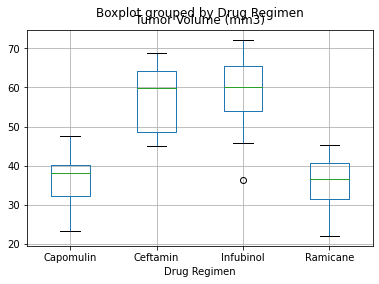

In [77]:
max_df.boxplot(column = ['Tumor Volume (mm3)'],by = 'Drug Regimen')

## Line and Scatter Plots


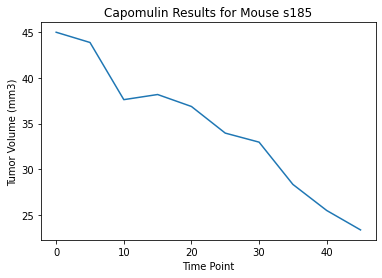

In [21]:
 # Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = original_df[original_df['Drug Regimen']=='Capomulin']
#change index to mouse ID 
df = capomulin.set_index('Mouse ID')
#remove other mouse IDs so only s185 shows
df = df.loc['s185']
#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
plt.plot(df['Timepoint'], df['Tumor Volume (mm3)'])
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Results for Mouse s185')
plt.show()

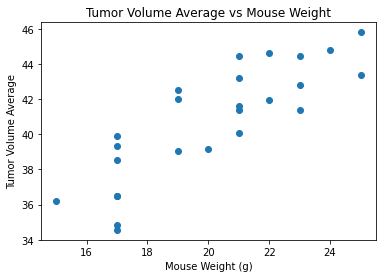

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume
y = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# establish x-axis value for the weight of the mice
x = capomulin.groupby('Mouse ID')['Weight (g)'].mean()

# produce scatter plot of the data
plt.scatter(x, y)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume Average')
plt.title('Tumor Volume Average vs Mouse Weight')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


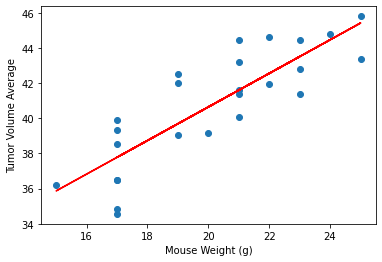

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
corr = st.pearsonr(x, y)

#print St. Pearson Correlation Coefficient
print('The correlation between both factors is', round(corr[0], 2))

# establish linear regression values
result = linregress(x, y)

# linear regression line 
plt.plot(x, result.intercept + result.slope * x, 'r')

# scatter plot of the data
plt.scatter(x, y)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume Average')
plt.show()